# RnB Soul Lyrics

In [1]:
# Imports
import requests
import os
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np

import matplotlib as plt

In [2]:
# Load .env environment variables
load_dotenv()

# Set RAPID API key
my_rapid_api_key = os.getenv("RAPID_API_KEY")

In [3]:
# Define function to use Shazam Core API

def get_chart_genre(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/charts/genre-world"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [4]:
# Define function to use Shazam Core API

def get_lyrics(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/tracks/details"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [5]:
# Use 'Track details' endpoint to retrieve lyrics for a single track

genre = 'SOUL_RNB'
limit_songs = 50
country = 'US'

querystring = {"country_code":country,"genre_code":genre,"limit":limit_songs}
chart_response = get_chart_genre(querystring)

In [6]:
# Retrieve Track IDs

track_ids=[] # song identifier
titles = [] # song name
subtitles = [] # Main artist and featured artists

for track in range(len(chart_response)):
    track_ids.append(chart_response[track]['id'])
    titles.append(chart_response[track]['title'])
    subtitles.append(chart_response[track]['subtitle'])

print(f"The number of songs retrieved is : {len(track_ids)}")

chart_songs = pd.DataFrame({"Track Name": titles, "Artists": subtitles, 'TrackIDs': track_ids}).set_index('TrackIDs')
chart_songs.head(5)

The number of songs retrieved is : 50


,Track Name,Artists
TrackIDs,,
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic"
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d
510700753,Save Your Tears,The Weeknd
158832749,Idfc,Blackbear
579903331,Take My Breath,The Weeknd


In [7]:
# Look at the data

from collections import Counter

artists_list = list(chart_songs.Artists)
artist_counts = {artist: artists_list.count(artist) for artist in artists_list} #dict with frequency of artist in top chart

artists_df = pd.DataFrame(list(artist_counts.items()),columns = ['Artists','No. Songs in Top Chart']).set_index('Artists')
artists_df.sort_values(by = 'No. Songs in Top Chart', ascending=False, inplace=True) #sort values

In [8]:
artists_df

,No. Songs in Top Chart
Artists,
The Weeknd,4
"Bruno Mars, Anderson .Paak & Silk Sonic",2
"Earth, Wind & Fire",2
Doja Cat,2
GIVĒON,2
Gloria Gaynor,1
The Weeknd & Ariana Grande,1
"Lipps, Inc.",1
Rihanna,1


<AxesSubplot:title={'center':'RNB Artists on Top Chart'}, xlabel='Artists'>

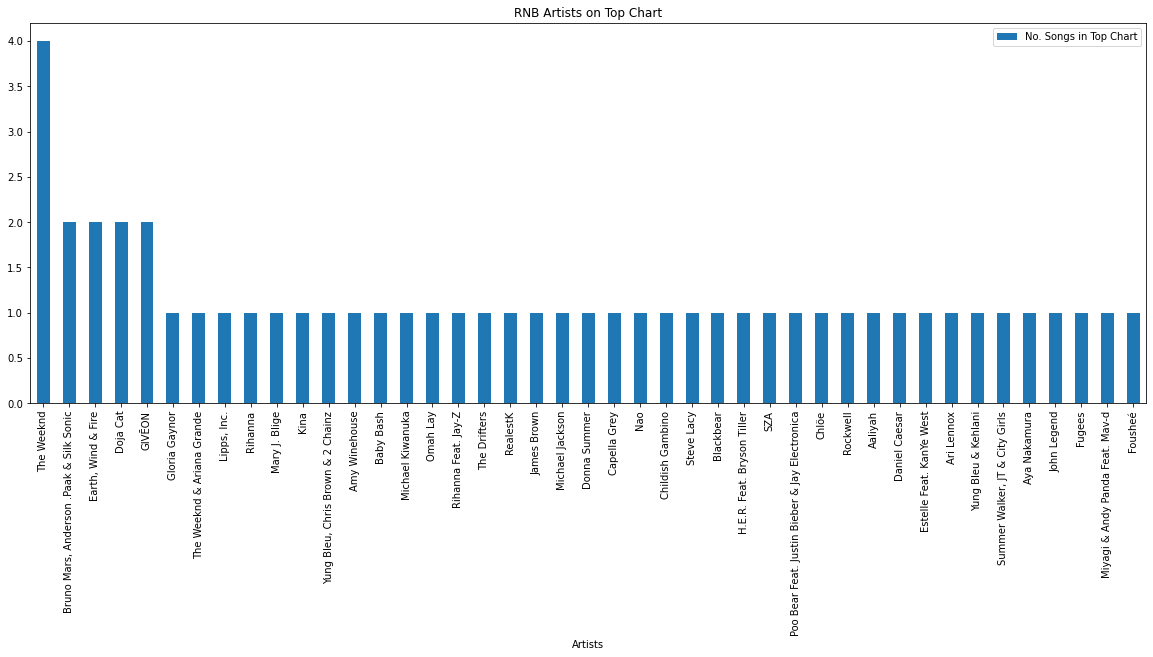

In [9]:
artists_df.plot.bar(figsize =(20, 7), title = 'RNB Artists on Top Chart')

In [10]:
# Retrieve Lyrics for all TrackIDs

track_ids  # the list created in "Search for top songs in Genre" section is required

lyrics=[]

for trackID in track_ids:
    querystring = {"track_id":trackID}
    track_details_response = get_lyrics(querystring)

    if track_details_response['sections'][1]['type'] != "LYRICS":  # Note: tracks with a type != "LYRICS" don't contain lyrics
        lyrics.append([''])
    else:
        track_lyrics = track_details_response['sections'][1]['text']
        lyrics.append(track_lyrics)

In [11]:
# Add lyrics column to dataframe with chart songs

all_lyrics = pd.Series(" ".join(map(str,song)) for song in lyrics) #each song is stored as a list, this turns each list into a string
all_lyrics_df = pd.DataFrame({"Lyrics": all_lyrics, "Track IDs": track_ids}).set_index('Track IDs')

lyrics_df = pd.concat([chart_songs, all_lyrics_df], axis=1)
lyrics_df.head(5)

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d,Для тебя найду добро и верну ему пульс Вновь к...
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...


In [12]:
lyrics_df 

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
591295396,Marmalade,Miyagi & Andy Panda Feat. Mav-d,Для тебя найду добро и верну ему пульс Вновь к...
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo..."
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev..."
502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...


In [13]:
lyrics_df.describe()

,Track Name,Artists,Lyrics
count,50,50,50
unique,50,43,49
top,Smokin Out The Window,The Weeknd,
freq,1,4,2


In [14]:
#Remove empty lyrics
new_lyrics_df = lyrics_df.drop(
    [
        '591295396', '585090484', '437075280'
    ]
)
new_lyrics_df

,Track Name,Artists,Lyrics
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender..."
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo..."
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev..."
502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...
578449926,Have Mercy,Chlöe,"Murda on the beat, so it's not nice Booty so b..."


In [15]:
new_lyrics_df.describe()

,Track Name,Artists,Lyrics
count,47,47,47
unique,47,41,47
top,Smokin Out The Window,The Weeknd,"Wait a minute, this love started out so tender..."
freq,1,4,1


# Tokenizer
In this section, I will use NLTK and Python to tokenize the text. This will include:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [16]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [18]:
def tokenizer(Lyrics):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(Lyrics)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['', 'doo', 'ca', 'nt', 'ay', 'wan', 'wo', 'ta', 'oh', 'ohoh', 'cause', 'fuckin', 'fuck', 'shit', 'nigga']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [19]:
# Create a new tokens column for lyrics
lyrics_tokens = [tokenizer(words) for words in new_lyrics_df['Lyrics']]
new_lyrics_df['Tokens'] = lyrics_tokens
new_lyrics_df.head()

,Track Name,Artists,Lyrics,Tokens
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv..."


In [20]:
new_lyrics_df[['Lyrics', 'Tokens']]

,Lyrics,Tokens
587835563,"Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
510700753,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
158832749,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
579903331,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."
433417422,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv..."
582361274,"I be so sick of you niggas, y'all contradictin...","[sick, nigga, yall, contradicting, bored, come..."
503576063,Yeah I've been tryna call I've been on my own...,"[yeah, tryna, call, long, enough, maybe, show,..."
412210310,"Sometimes it's hard to face reality, oh, oh Ev...","[sometimes, hard, face, reality, even, though,..."
502331040,I've been goin' through some things (oh) I str...,"[goin, thing, struggle, inner, man, yeah, yeah..."
578449926,"Murda on the beat, so it's not nice Booty so b...","[murda, beat, nice, booty, big, work, lord, me..."


# NGrams and Frequency Analysis
In this section there are the ngrams and word frequency for lyrics.

Use NLTK to produce the n-grams for N = 2.


In [21]:
from collections import Counter
from nltk import ngrams

In [22]:
# Generate the Bitcoin N-grams where N=2
lyrics_text = ' '.join(new_lyrics_df["Lyrics"])
lyrics_processed = tokenizer(lyrics_text)
lyrics_ngrams = Counter(ngrams(lyrics_processed, n=2))
print(dict(lyrics_ngrams.most_common(10)))

{('feel', 'love'): 28, ('take', 'funkytown'): 28, ('music', 'music'): 28, ('feel', 'like'): 27, ('please', 'stop'): 25, ('reason', 'though'): 23, ('love', 'feel'): 23, ('funkytown', 'take'): 22, ('save', 'tear'): 21, ('tear', 'another'): 21}


In [23]:
lyrics_text

'Wait a minute, this love started out so tender, so sweet But now she got me smokin\' out the window  Must\'ve spent 35, 45 thousand up in Tiffany\'s (oh, no) Got her badass kids runnin\' \'round my whole crib Like it\'s Chuck E. Cheese (whoa, whoa) Put me in a jam with her ex-man in the UFC Can\'t believe it (can\'t believe it), I\'m in disbelief  This bitch got me payin\' her rent, payin\' for trips Diamonds on her neck, diamonds on her wrist And here I am, all alone (all alone), uh I\'m so cold, I\'m so cold, you got me out here  Smokin\' out the window (smokin\' out the window) Singin\', "How could she do this to me?" (How could she do this to me?) Oh, I thought that girl belonged to only me (mhmm) But I was wrong, \'cause she belong To everybody, everybody, ooh  Just the other night, she was grippin\' on me tight Screamin\', "Hercules" ("Hercules, Hercules") Got me in the club lookin\' for a new love Someone, help me, please (help me please, help me please) Baby, why you doin\' th

In [24]:
# Use the token_count function to generate the top 10 words from the lyrics
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [25]:
# Use token_count to get the top 10 words from hip hop rap lyrics
lyrics_top_10 = token_count(lyrics_processed)
lyrics_top_10

[('like', 197),
 ('get', 113),
 ('love', 110),
 ('got', 110),
 ('feel', 105),
 ('know', 102),
 ('take', 102),
 ('baby', 91),
 ('let', 84),
 ('go', 74)]

# Word Clouds
In this section, I generate word clouds hip hop rap lyrics

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'RnB Lyrics')

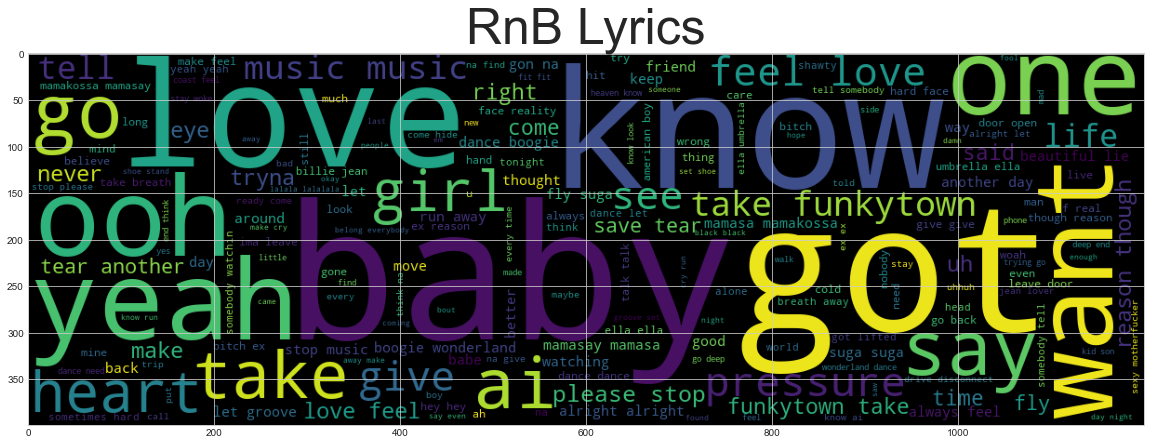

In [27]:
# Generate the Bitcoin word cloud
lyrics_words_joined = ' '.join(lyrics_processed)
wc = WordCloud(width=1200, height=400).generate(lyrics_words_joined)
plt.imshow(wc)
plt.title('RnB Lyrics', fontdict={'fontsize':50}, loc='Center')

# Named Entity Recognition
In this section, you will build a named entity recognition model for the hip hop lyrics, then visualize the tags using SpaCy.

In [28]:
new_lyrics_df

,Track Name,Artists,Lyrics,Tokens
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g..."
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ..."
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev..."
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t..."
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv..."
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin...","[sick, nigga, yall, contradicting, bored, come..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...,"[yeah, tryna, call, long, enough, maybe, show,..."
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev...","[sometimes, hard, face, reality, even, though,..."
502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...,"[goin, thing, struggle, inner, man, yeah, yeah..."
578449926,Have Mercy,Chlöe,"Murda on the beat, so it's not nice Booty so b...","[murda, beat, nice, booty, big, work, lord, me..."


In [29]:
new_lyrics_df['Lyrics']

587835563    Wait a minute, this love started out so tender...
510700753    Yeah I saw you dancing in a crowded room You l...
158832749    Tell me pretty lies Look me in the face Tell m...
579903331    I saw the fire in your eyes I saw the fire whe...
433417422    Please, allow me to show you something  Somebo...
582361274    I be so sick of you niggas, y'all contradictin...
503576063    Yeah  I've been tryna call I've been on my own...
412210310    Sometimes it's hard to face reality, oh, oh Ev...
502331040    I've been goin' through some things (oh) I str...
578449926    Murda on the beat, so it's not nice Booty so b...
560275260    Said baby, said baby, said baby  What you doin...
99111081     Who's watching? Tell me who's watching Who's w...
5323011      Uh Dirty South (uh-huh) Can y'all really feel ...
342158320    Something bad is 'bout to happen to me I don't...
332694991    Through drought and famine, natural disasters ...
583956238    Ah (pressure) Mm-mm (pressure) Ooh-ooh, oo

In [30]:
new_lyrics_df['Lyrics'].dtype

dtype('O')

In [31]:
new_lyrics_df['Lyrics_str'] = new_lyrics_df['Lyrics'].str.split(',')

In [32]:
new_lyrics_df

,Track Name,Artists,Lyrics,Tokens,Lyrics_str
587835563,Smokin Out The Window,"Bruno Mars, Anderson .Paak & Silk Sonic","Wait a minute, this love started out so tender...","[wait, minute, love, started, tender, sweet, g...","[Wait a minute, this love started out so tend..."
510700753,Save Your Tears,The Weeknd,Yeah I saw you dancing in a crowded room You l...,"[yeah, saw, dancing, crowded, room, look, happ...",[Yeah I saw you dancing in a crowded room You ...
158832749,Idfc,Blackbear,Tell me pretty lies Look me in the face Tell m...,"[tell, pretty, lie, look, face, tell, love, ev...",[Tell me pretty lies Look me in the face Tell ...
579903331,Take My Breath,The Weeknd,I saw the fire in your eyes I saw the fire whe...,"[saw, fire, eye, saw, fire, look, eye, tell, t...",[I saw the fire in your eyes I saw the fire wh...
433417422,Could've Been,H.E.R. Feat. Bryson Tiller,"Please, allow me to show you something Somebo...","[please, allow, show, something, somebody, giv...","[Please, allow me to show you something Some..."
582361274,I Hate U,SZA,"I be so sick of you niggas, y'all contradictin...","[sick, nigga, yall, contradicting, bored, come...","[I be so sick of you niggas, y'all contradict..."
503576063,Blinding Lights,The Weeknd,Yeah I've been tryna call I've been on my own...,"[yeah, tryna, call, long, enough, maybe, show,...",[Yeah I've been tryna call I've been on my ow...
412210310,Hard 2 Face Reality,Poo Bear Feat. Justin Bieber & Jay Electronica,"Sometimes it's hard to face reality, oh, oh Ev...","[sometimes, hard, face, reality, even, though,...","[Sometimes it's hard to face reality, oh, oh..."
502331040,Streets,Doja Cat,I've been goin' through some things (oh) I str...,"[goin, thing, struggle, inner, man, yeah, yeah...",[I've been goin' through some things (oh) I st...
578449926,Have Mercy,Chlöe,"Murda on the beat, so it's not nice Booty so b...","[murda, beat, nice, booty, big, work, lord, me...","[Murda on the beat, so it's not nice Booty so..."


In [33]:
import spacy
from spacy import displacy

In [34]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [36]:
# Run the NER processor on all of the text
rnb_ner = nlp(lyrics_text)

# Add a title to the document
rnb_ner.user_data['title'] = 'R&B Soul NER'

In [37]:
# Render the visualization
displacy.render(rnb_ner, style='ent')

In [38]:
# List all Entities
for ent in rnb_ner.ents:
    print(ent.text, ent.label_)

35 CARDINAL
45 thousand CARDINAL
Tiffany's ORG
Chuck E. Cheese PERSON
UFC ORG
Screamin PERSON
Hercules PERSON
Hercules GPE
Hercules GPE
Smokin PERSON
Benzo ORG
One CARDINAL
one CARDINAL
second ORDINAL
another day DATE
another day DATE
another day DATE
another day DATE
another day DATE
another day DATE
Damn WORK_OF_ART
Miami GPE
First ORDINAL
Sin City's GPE
Talkin GPE
all night TIME
Love WORK_OF_ART
Reality PERSON
just hours ago TIME
Wacko WORK_OF_ART
Don Dada PERSON
Tryna PERSON
Paris Plan ORG
No Final Fantasy ORG
one CARDINAL
Booty PERSON
three CARDINAL
Cartier PERSON
Laffy Taffy PERSON
Booty PERSON
Floss ORG
Floss ORG
Laffy Taffy PERSON
Booty PERSON
Floss ORG
tonight TIME
Purple Haze PERSON
Girl PRODUCT
tonight TIME
tonight TIME
9 CARDINAL
the Twilight Zone EVENT
Psycho GPE
IRS ORG
East Coast LOC
West Coast LOC
South LOC
East Coast LOC
West Coast LOC
South LOC
East Coast LOC
West Coast LOC
South LOC
East Coast LOC
West Coast LOC
these days DATE
Japan GPE
Aaliyah (Aaliyah) Give ORG
Ho

In [44]:
# new_lyrics_df.to_csv('rnb_lyrics.csv', index=False)

# Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:

- The keys should be all of the words in the corpus
- The values should be a list of the words that follow the keys

In [40]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    #words = text.split('')
    for t in text:
        words = t.split(' ')
        print(words[0])
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [41]:
# Create the dictionary for lyrics, take a look at it
# lyrics_dict = new_lyrics_df['Lyrics_str'].apply(markov_chain)

lyrics_dict = markov_chain(lyrics_text)
lyrics_dict

W
a
i
t

a

m
i
n
u
t
e
,

t
h
i
s

l
o
v
e

s
t
a
r
t
e
d

o
u
t

s
o

t
e
n
d
e
r
,

s
o

s
w
e
e
t

B
u
t

n
o
w

s
h
e

g
o
t

m
e

s
m
o
k
i
n
'

o
u
t

t
h
e

w
i
n
d
o
w


M
u
s
t
'
v
e

s
p
e
n
t

3
5
,

4
5

t
h
o
u
s
a
n
d

u
p

i
n

T
i
f
f
a
n
y
'
s

(
o
h
,

n
o
)

G
o
t

h
e
r

b
a
d
a
s
s

k
i
d
s

r
u
n
n
i
n
'

'
r
o
u
n
d

m
y

w
h
o
l
e

c
r
i
b

L
i
k
e

i
t
'
s

C
h
u
c
k

E
.

C
h
e
e
s
e

(
w
h
o
a
,

w
h
o
a
)

P
u
t

m
e

i
n

a

j
a
m

w
i
t
h

h
e
r

e
x
-
m
a
n

i
n

t
h
e

U
F
C

C
a
n
'
t

b
e
l
i
e
v
e

i
t

(
c
a
n
'
t

b
e
l
i
e
v
e

i
t
)
,

I
'
m

i
n

d
i
s
b
e
l
i
e
f


T
h
i
s

b
i
t
c
h

g
o
t

m
e

p
a
y
i
n
'

h
e
r

r
e
n
t
,

p
a
y
i
n
'

f
o
r

t
r
i
p
s

D
i
a
m
o
n
d
s

o
n

h
e
r

n
e
c
k
,

d
i
a
m
o
n
d
s

o
n

h
e
r

w
r
i
s
t

A
n
d

h
e
r
e

I

a
m
,

a
l
l

a
l
o
n
e

(
a
l
l

a
l
o
n
e
)
,

u
h

I
'
m

s
o

c
o
l
d
,

I
'
m

s
o

c
o
l
d
,

y
o
u

g
o
t

m
e

o
u
t

h
e
r
e


S
m
o
k
i
n
'

o
u
t

t
h
e

w
i
n
d
o
w

(
s
m
o
k
i
n
'

{}

# Create a Text Generator
We're going to create a function that generates sentences. It will take two things as inputs:

- The dictionary you just created
- The number of words you want generated

In [42]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [43]:
generate_sentence(lyrics_dict)

IndexError: Cannot choose from an empty sequence